In [33]:
# imports 
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns







In [2]:
# getting all the paths from corresponding images
paths_train_PNEUMONIA = glob.glob("chest_xray/train/PNEUMONIA/*.jpeg")
paths_train_NORMAL = glob.glob("chest_xray/train/NORMAL/*.jpeg")
paths_test_PNEUMONIA = glob.glob("chest_xray/test/PNEUMONIA/*.jpeg")
paths_test_NORMAL = glob.glob("chest_xray/test/NORMAL/*.jpeg")


# Total images for each folder
print('Train PNEUMONIA: '+str(len(paths_train_PNEUMONIA)))
print('Train NORMAL: '+str(len(paths_train_NORMAL)))
print('Test PNEUMONIA: '+str(len(paths_test_PNEUMONIA)))
print('Test PNEUMONIA: '+str(len(paths_test_NORMAL)))


# Total images for each Directory
print('Total Number of Train samples: '+ str(len(paths_train_PNEUMONIA)+len(paths_train_NORMAL)))
print('Total Number of Test samples: '+ str(len(paths_test_PNEUMONIA)+len(paths_test_NORMAL)))


Train PNEUMONIA: 3875
Train NORMAL: 1341
Test PNEUMONIA: 398
Test PNEUMONIA: 242
Total Number of Train samples: 5216
Total Number of Test samples: 640


In [3]:
train_images = []
train_labels = []
test_images = []
test_labels = []


for path in tqdm(paths_train_PNEUMONIA): 
    image= cv2.imread(path)
    image=cv2.resize(image, (256, 256))
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    train_images.append(image)
    train_labels.append(1)

for path in tqdm(paths_train_NORMAL): 
    image= cv2.imread(path)
    image=cv2.resize(image, (256, 256))
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    train_images.append(image)
    train_labels.append(0)
    
for path in tqdm(paths_test_PNEUMONIA): 
    image= cv2.imread(path)
    image=cv2.resize(image, (256, 256))
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    test_images.append(image)
    test_labels.append(1)
    
for path in tqdm(paths_test_NORMAL): 
    image= cv2.imread(path)
    image=cv2.resize(image, (256, 256))
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    test_images.append(image)
    test_labels.append(0)
    


100%|██████████| 242/242 [00:04<00:00, 53.28it/s]


In [4]:
def create_dataframe(path_names,label_name):
    paths = []
    labels = []

    for path in path_names:
        paths.append(path)
        labels.append(label_name)
    df = pd.DataFrame()
    df['paths'] = paths
    df['labels'] = labels
    return df

In [5]:
# Calling the create dataframe function twice in the pandas concat function to get 
# our three main data frames for training and testing purposes
train_df = pd.concat([
    create_dataframe(paths_train_PNEUMONIA,'1'), 
    create_dataframe(paths_train_NORMAL,'0')
],ignore_index=True)

test_df = pd.concat([
    create_dataframe(paths_test_PNEUMONIA,'1'), 
    create_dataframe(paths_test_NORMAL,'0')
],ignore_index=True)


In [6]:
train_df

,paths,labels
0,chest_xray/train/PNEUMONIA/person63_bacteria_3...,1
1,chest_xray/train/PNEUMONIA/person1438_bacteria...,1
2,chest_xray/train/PNEUMONIA/person755_bacteria_...,1
3,chest_xray/train/PNEUMONIA/person478_virus_975...,1
4,chest_xray/train/PNEUMONIA/person661_bacteria_...,1
...,...,...
5211,chest_xray/train/NORMAL/IM-0183-0001.jpeg,0
5212,chest_xray/train/NORMAL/IM-0460-0001.jpeg,0
5213,chest_xray/train/NORMAL/NORMAL2-IM-1011-0001.jpeg,0
5214,chest_xray/train/NORMAL/NORMAL2-IM-0826-0001.jpeg,0


In [7]:
test_df

,paths,labels
0,chest_xray/test/PNEUMONIA/person147_bacteria_7...,1
1,chest_xray/test/PNEUMONIA/person100_bacteria_4...,1
2,chest_xray/test/PNEUMONIA/person78_bacteria_38...,1
3,chest_xray/test/PNEUMONIA/person124_bacteria_5...,1
4,chest_xray/test/PNEUMONIA/person1647_virus_284...,1
...,...,...
635,chest_xray/test/NORMAL/NORMAL2-IM-0309-0001.jpeg,0
636,chest_xray/test/NORMAL/NORMAL2-IM-0246-0001-00...,0
637,chest_xray/test/NORMAL/NORMAL2-IM-0292-0001.jpeg,0
638,chest_xray/test/NORMAL/NORMAL2-IM-0221-0001.jpeg,0


## Checking Image sizes

In [13]:
shape_0=[]
shape_1=[]
for filepath in train_df['paths'].values:
    img= cv2.imread(filepath)
    shape_0.append(img.shape[0])
    shape_1.append(img.shape[1])

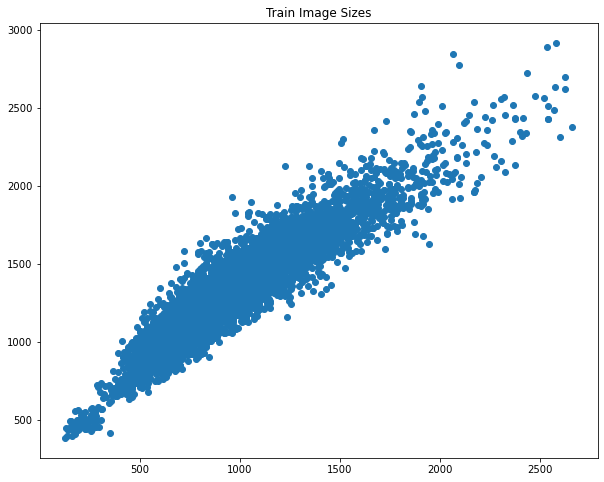

In [19]:

plt.figure(figsize=(10,8))
plt.title('Train Image Sizes')
plt.scatter(shape_0, shape_1);

In [28]:
shape_0=[]
shape_1=[]
for filepath in test_df['paths'].values:
    img= cv2.imread(filepath)
    shape_0.append(img.shape[0])
    shape_1.append(img.shape[1])

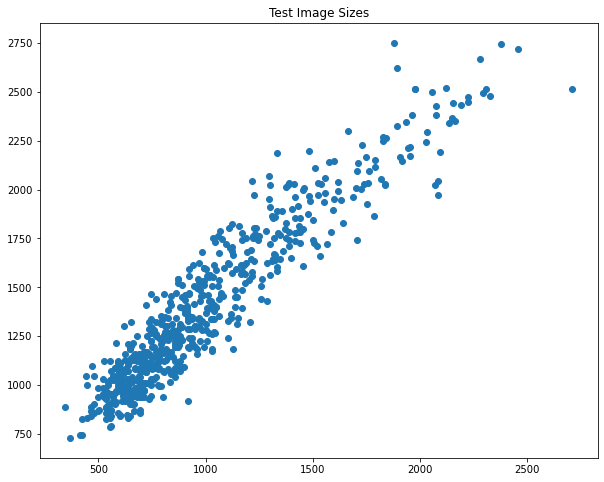

In [30]:
plt.figure(figsize=(10,8))
plt.title('Test Image Sizes')
plt.scatter(shape_0, shape_1);

## Class Distribuation

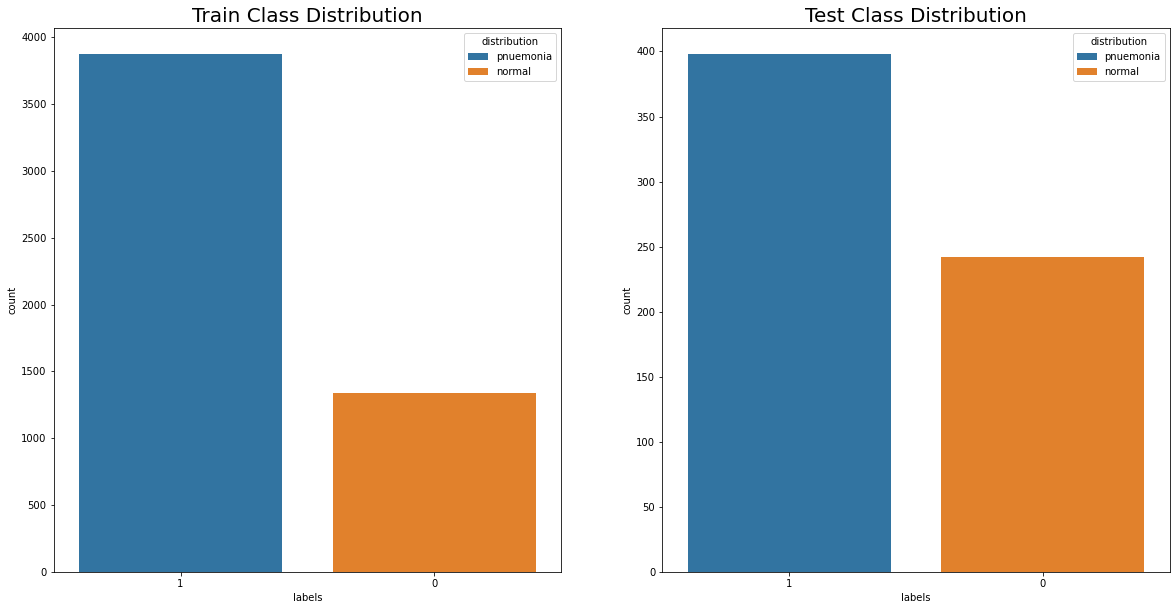

In [120]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
ax = sns.countplot(data=train_df, x="labels", hue='labels', dodge=False)
h,l = ax.get_legend_handles_labels()
labels=["pnuemonia", "normal"]
ax.legend(h,labels,title="distribution", loc="upper right") 
plt.title('Train Class Distribution',fontsize=20)



plt.subplot(1,2,2)
ax = sns.countplot(data=test_df, x="labels", hue='labels', dodge=False)
h,l = ax.get_legend_handles_labels()
labels=["pnuemonia", "normal"]
ax.legend(h,labels,title="distribution", loc="upper right") 
plt.title('Test Class Distribution',fontsize=20)

plt.show()

## Visualising Images

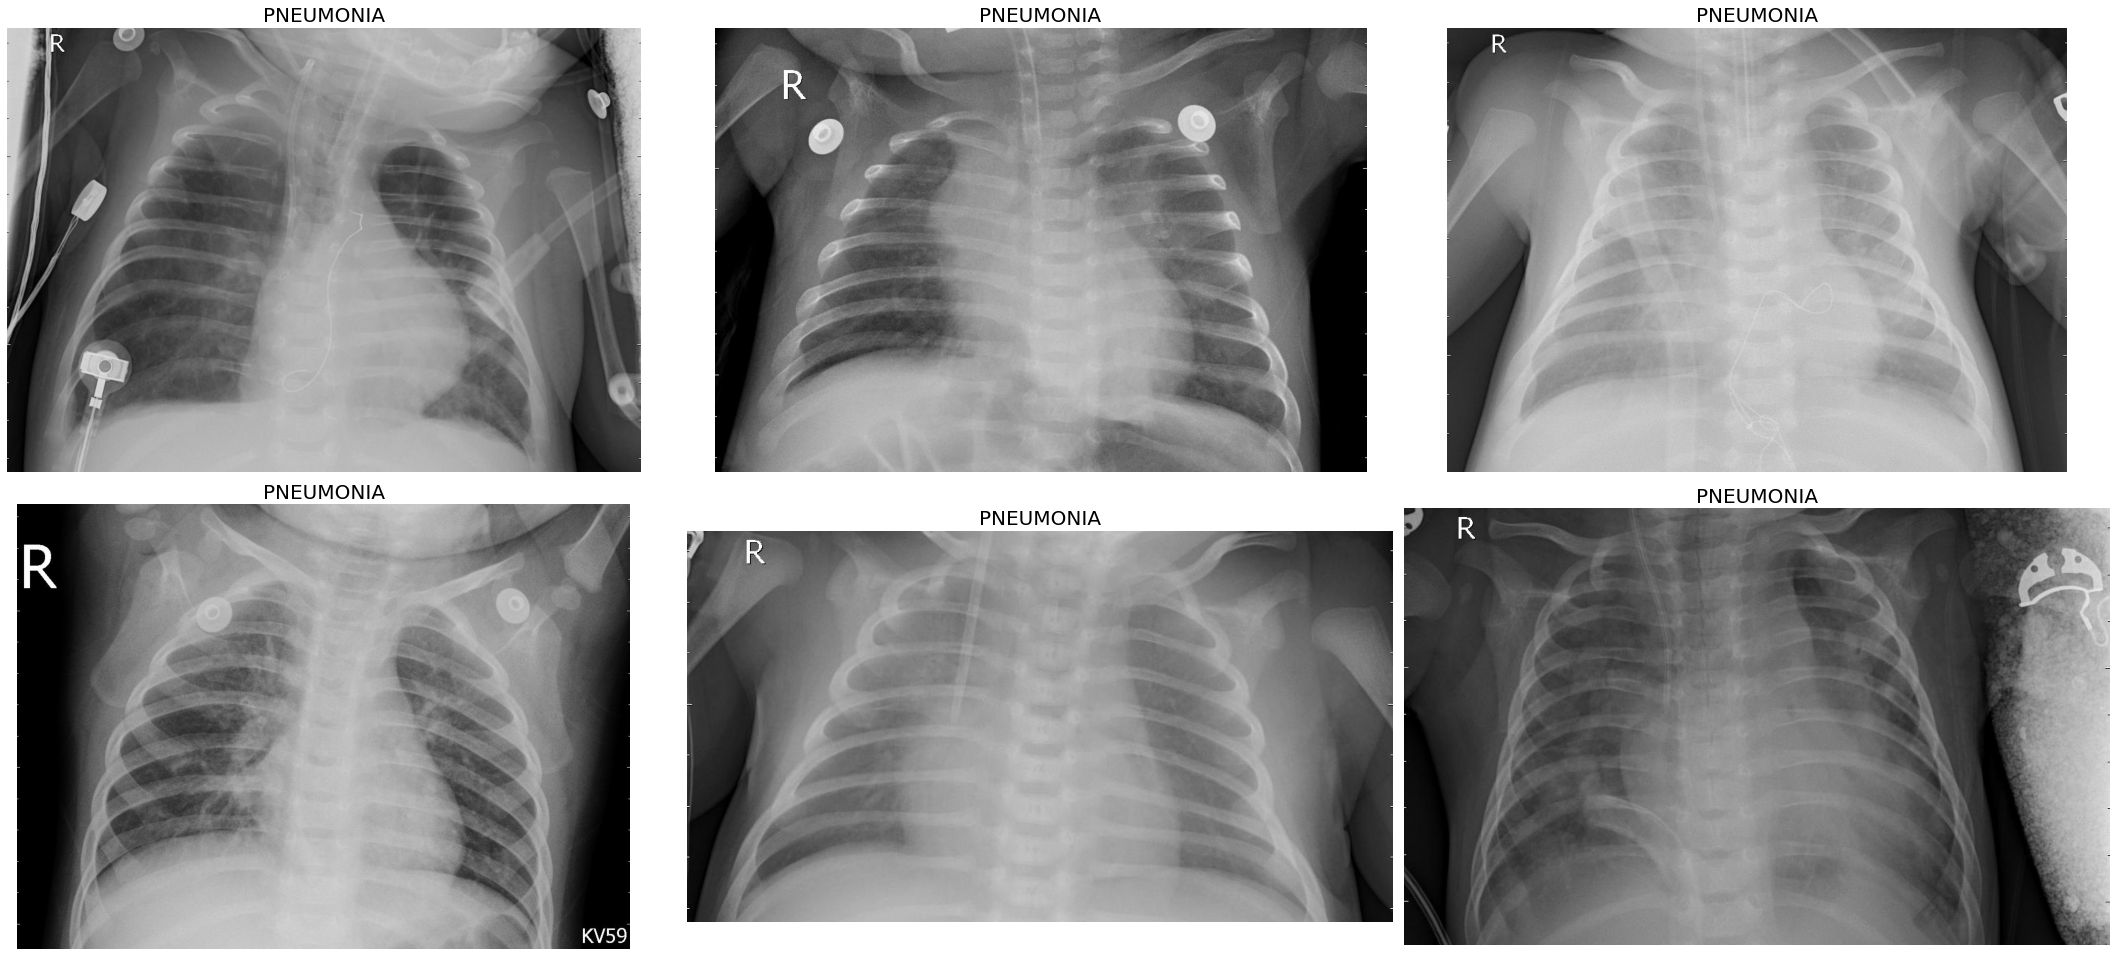

In [124]:
train_images_files= train_df['paths'].head(6).values

%matplotlib inline
plt.figure(figsize=(30,20))
for i in range(6):
    plt.subplot(3,3,i+1)
    img= cv2.imread(train_images_files[i])
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title('PNEUMONIA',fontsize=20)
    plt.tight_layout()


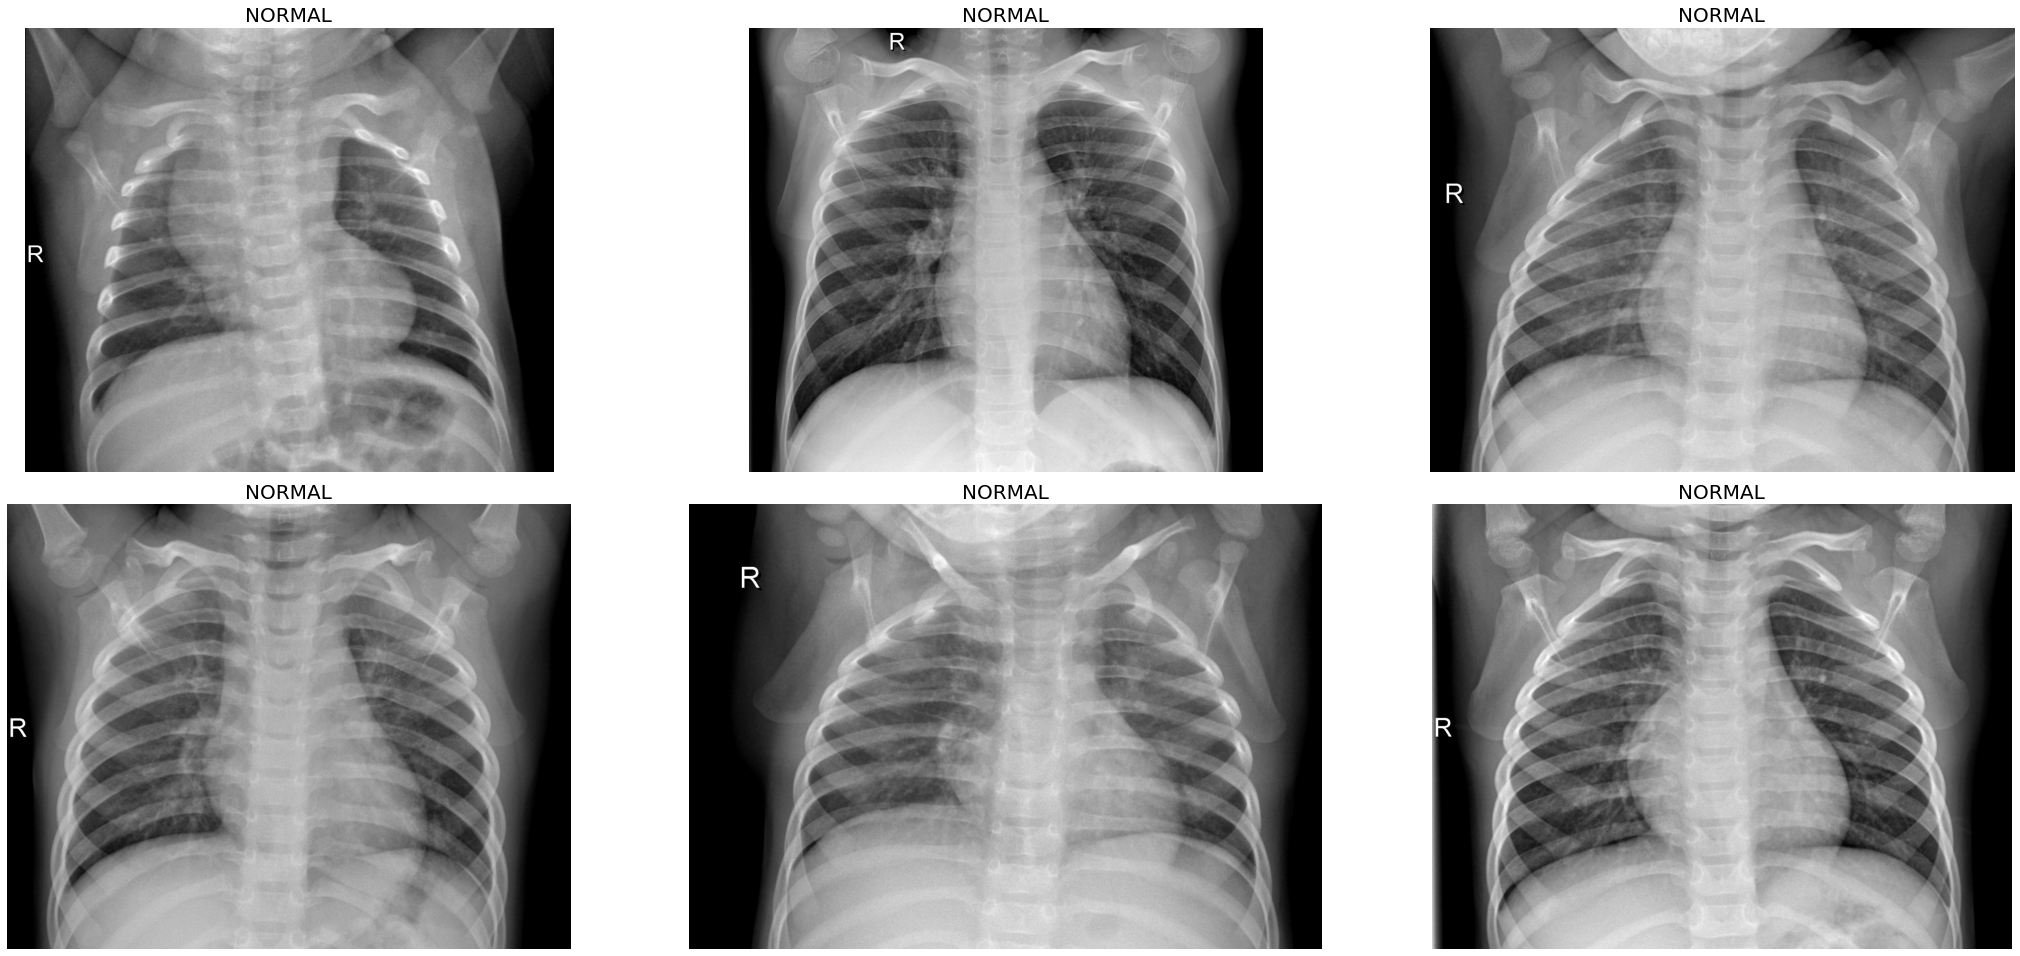

In [123]:
train_images_files= train_df['paths'].tail(6).values

%matplotlib inline
plt.figure(figsize=(30,20))
for i in range(6):
    plt.subplot(3,3,i+1)
    img= cv2.imread(train_images_files[i])
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title('NORMAL',fontsize=20)
    plt.tight_layout()